# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress #slope and intercept to determine correlation

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy #ask for closest city name to a lat and long (geo) location

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90) #tuple to create a lat range 
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 563


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?units=imperial&apiKey={weather_api_key}&q='

#cities2 = ['chicago','london'] tester

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = time.ctime(city_weather['dt'])

        # # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tiksi
Processing Record 2 of Set 1 | puerto natales
Processing Record 3 of Set 1 | mitu
Processing Record 4 of Set 1 | tazovsky
Processing Record 5 of Set 1 | margaret river
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | utrik
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | guasdualito
Processing Record 11 of Set 1 | wailua homesteads
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | vaghodia
Processing Record 14 of Set 1 | namibe
Processing Record 15 of Set 1 | ilulissat
Processing Record 16 of Set 1 | bodaybo
Processing Record 17 of Set 1 | fort mcmurray
Processing Record 18 of Set 1 | isafjordur
Processing Record 19 of Set 1 | iskateley
Processing Record 20 of Set 1 | vorgashor
Processing Record 21 of Set 1 | alesd
Processing Record 22 of Set 1 | waitangi
Processing Reco

Processing Record 41 of Set 4 | la'ie
Processing Record 42 of Set 4 | stanley
Processing Record 43 of Set 4 | emerald
Processing Record 44 of Set 4 | crane
Processing Record 45 of Set 4 | holualoa
Processing Record 46 of Set 4 | izhevsk
Processing Record 47 of Set 4 | port augusta
Processing Record 48 of Set 4 | arteche
Processing Record 49 of Set 4 | cannonvale
Processing Record 0 of Set 5 | puerto leguizamo
Processing Record 1 of Set 5 | ahau
City not found. Skipping...
Processing Record 2 of Set 5 | coquimbo
Processing Record 3 of Set 5 | taungdwingyi
Processing Record 4 of Set 5 | san pedro
Processing Record 5 of Set 5 | bikenibeu village
Processing Record 6 of Set 5 | naze
Processing Record 7 of Set 5 | georgetown
Processing Record 8 of Set 5 | yokadouma
Processing Record 9 of Set 5 | nouadhibou
Processing Record 10 of Set 5 | al kharijah
Processing Record 11 of Set 5 | port mathurin
Processing Record 12 of Set 5 | hammerfest
Processing Record 13 of Set 5 | sinabang
Processing Rec

Processing Record 31 of Set 8 | devinuwara
City not found. Skipping...
Processing Record 32 of Set 8 | calatayud
Processing Record 33 of Set 8 | shimoda
Processing Record 34 of Set 8 | northam
Processing Record 35 of Set 8 | lima
Processing Record 36 of Set 8 | bonga
Processing Record 37 of Set 8 | kappeln
Processing Record 38 of Set 8 | loukhi
Processing Record 39 of Set 8 | floro
Processing Record 40 of Set 8 | vernon
Processing Record 41 of Set 8 | bargara
City not found. Skipping...
Processing Record 42 of Set 8 | deder
Processing Record 43 of Set 8 | zakamensk
Processing Record 44 of Set 8 | illizi
Processing Record 45 of Set 8 | milevsko
Processing Record 46 of Set 8 | karratha
Processing Record 47 of Set 8 | okuta
Processing Record 48 of Set 8 | mar del plata
Processing Record 49 of Set 8 | whakatane
Processing Record 0 of Set 9 | balugaon
Processing Record 1 of Set 9 | muisne
Processing Record 2 of Set 9 | phayakkhaphum phisai
Processing Record 3 of Set 9 | shira
Processing Rec

In [4]:
#city_data ... test

In [5]:
pd.DataFrame(city_data)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tiksi,71.6872,128.8694,-31.63,100,100,2.28,RU,Fri Feb 16 13:05:20 2024
1,puerto natales,-51.7236,-72.4875,66.65,55,0,5.75,CL,Fri Feb 16 13:05:21 2024
2,mitu,1.1983,-70.1733,85.28,72,60,2.62,CO,Fri Feb 16 13:05:21 2024
3,tazovsky,67.4667,78.7000,-24.39,94,15,7.27,RU,Fri Feb 16 13:05:22 2024
4,margaret river,-33.9500,115.0667,62.78,87,100,10.85,AU,Fri Feb 16 13:05:22 2024
...,...,...,...,...,...,...,...,...,...
531,mont-dore,-22.2833,166.5833,81.00,99,49,10.83,NC,Fri Feb 16 13:09:28 2024
532,al mawsil al jadidah,36.3346,43.0978,55.24,79,100,7.70,IQ,Fri Feb 16 13:09:29 2024
533,fada n'gourma,12.0622,0.3578,84.40,8,100,9.33,BF,Fri Feb 16 13:09:30 2024
534,woolgoolga,-30.1106,153.2007,71.04,90,27,5.48,AU,Fri Feb 16 13:09:30 2024


In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          536
Lat           536
Lng           536
Max Temp      536
Humidity      536
Cloudiness    536
Wind Speed    536
Country       536
Date          536
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tiksi,71.6872,128.8694,-31.63,100,100,2.28,RU,Fri Feb 16 13:05:20 2024
1,puerto natales,-51.7236,-72.4875,66.65,55,0,5.75,CL,Fri Feb 16 13:05:21 2024
2,mitu,1.1983,-70.1733,85.28,72,60,2.62,CO,Fri Feb 16 13:05:21 2024
3,tazovsky,67.4667,78.7000,-24.39,94,15,7.27,RU,Fri Feb 16 13:05:22 2024
4,margaret river,-33.9500,115.0667,62.78,87,100,10.85,AU,Fri Feb 16 13:05:22 2024


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bangassou,4.7413,22.8184,79.09,40,5,0.45,CF,Tue Feb 13 13:31:03 2024
1,iqaluit,63.7506,-68.5145,-4.27,70,75,2.30,CA,Tue Feb 13 13:31:04 2024
2,udachny,66.4167,112.4000,-33.56,66,100,5.79,RU,Tue Feb 13 13:31:04 2024
3,atafu village,-8.5421,-172.5159,81.00,86,100,24.58,TK,Tue Feb 13 13:31:05 2024
4,lib,8.3122,167.3766,80.17,68,100,18.50,MH,Tue Feb 13 13:31:06 2024


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

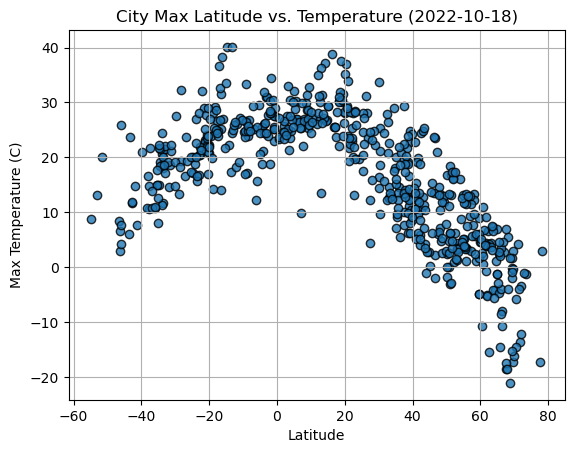

In [8]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

In [29]:
# city_data_df.plot.scatter('Lat','Max Temp', grid=True, linewidths=1,edgecolor='black') #pandas

In [100]:
def chart(x,y, title):
    plt.figure(figsize=[7,5])
    plt.scatter(x, y, edgecolor='black')
    plt.grid()
    plt.ylabel(title)
    #plt.savefig(f'output_data/Latitude_vs_{title}.png')
    plt.xlabel('Latitude')
    plt.title(f"Latitude vs {title} ({time.strftime('%Y-%m-%d')})")
    plt.show()

In [101]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties


x = city_data_df.Lat
y = city_data_df['Max Temp']
title = 'Max Temperature (C)'

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

<Figure size 640x480 with 0 Axes>

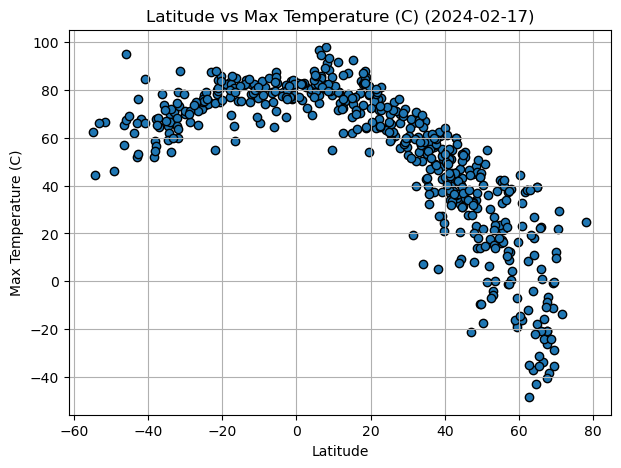

In [102]:
chart(x,y,title)

#### Latitude Vs. Humidity

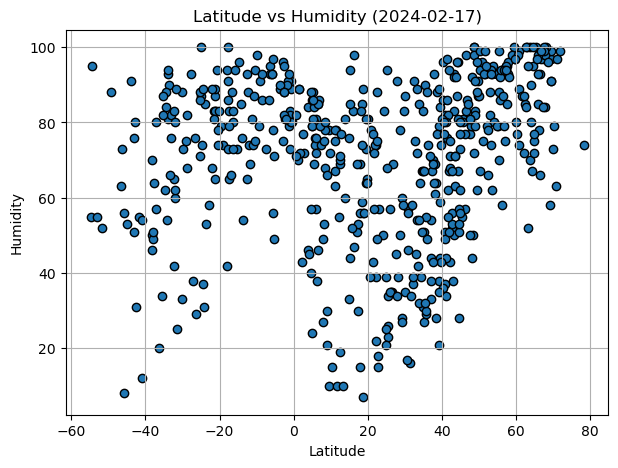

<Figure size 640x480 with 0 Axes>

In [103]:
# Build the scatter plots for latitude vs. humidity
# Incorporate the other graph properties
# y = city_data_df['Humidity']

y = city_data_df['Humidity']
title = 'Humidity'
chart(x,y,title)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

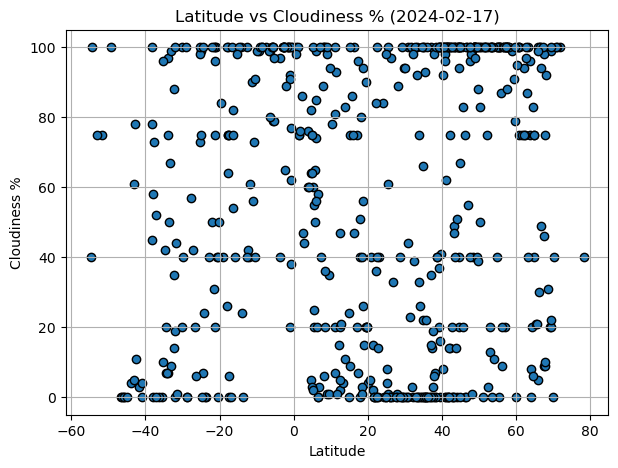

<Figure size 640x480 with 0 Axes>

In [104]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties
y = city_data_df['Cloudiness']
title = 'Cloudiness %'
chart(x,y,title)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

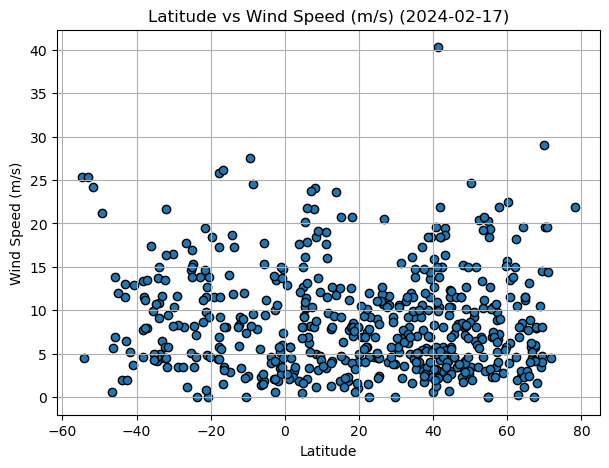

<Figure size 640x480 with 0 Axes>

In [106]:
# Build the scatter plots for latitude vs. wind speed
#Incorporate the other graph properties
y = city_data_df['Wind Speed']
title = 'Wind Speed (m/s)'
chart(x,y,title)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [ ]:
# X = credit_score_df['Yearly Groceries : Current Debt']
# y = credit_score_df['Yearly Expenditure : Current Debt']

# # Linear regression
# slope, intercept, r_value, p_value, std_err = st.linregress(X, y)

# # Plot data points
# plt.scatter(X, y, label='Data')

# # Plot regression line
# plt.plot(X, slope * X + intercept, color='black', label='Linear Regression')

# plt.xlabel('Yearly Groceries : Current Debt')
# plt.ylabel('Yearly Expenditure : Current Debt')
# plt.title('Positive Correlation 1')
# plt.legend()
# plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434118


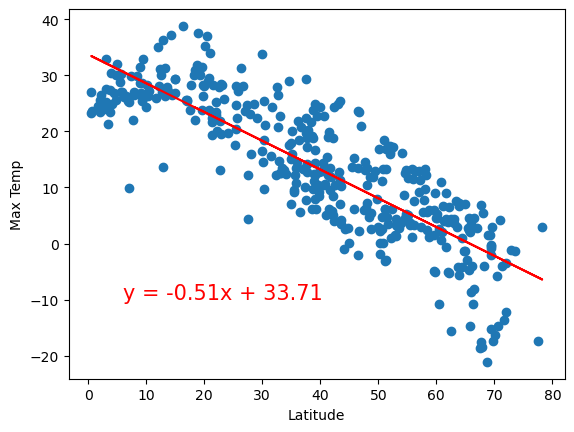

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.4121057168607245


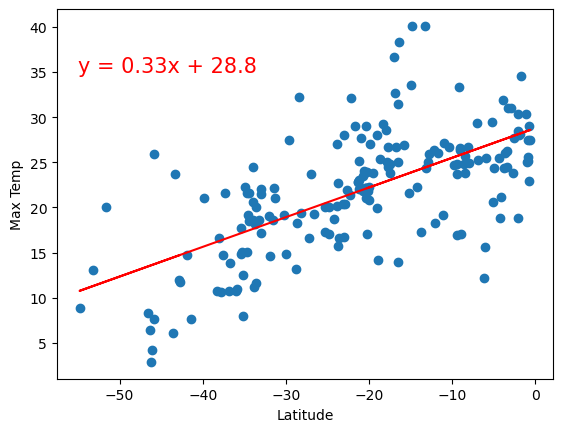

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


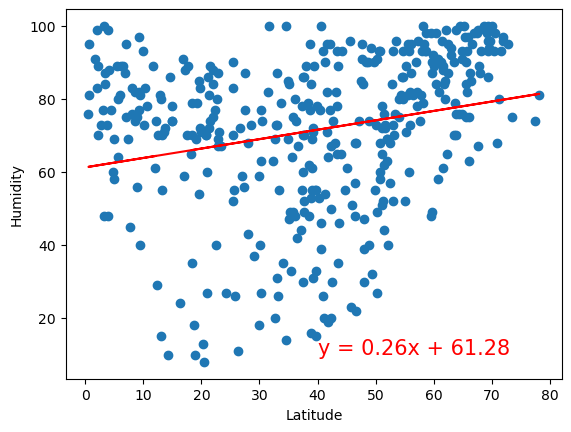

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


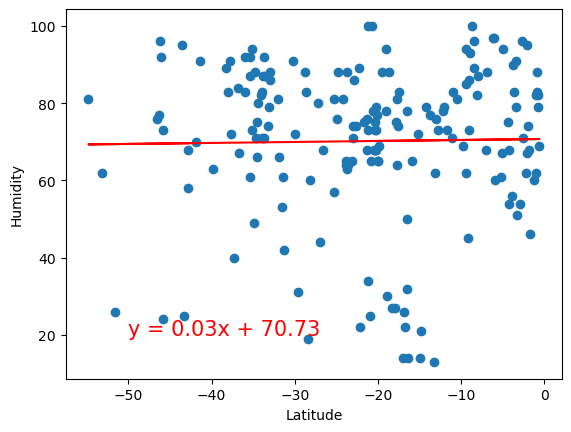

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


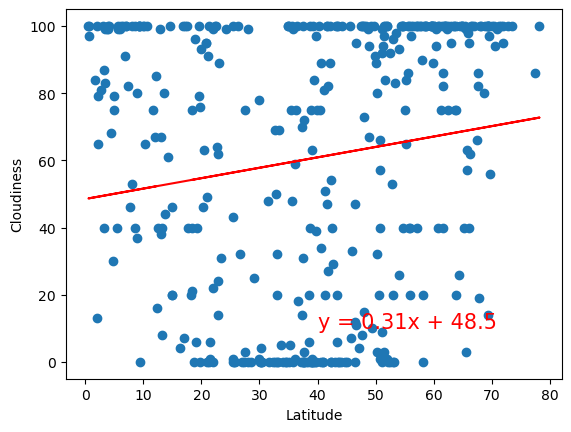

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


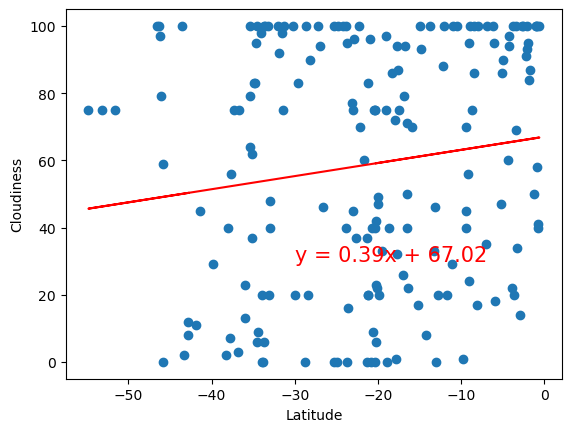

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


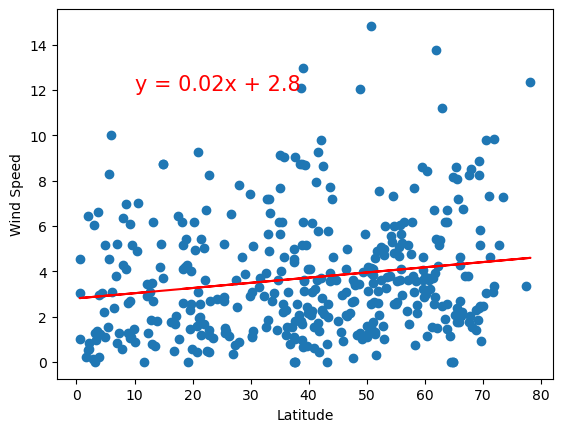

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


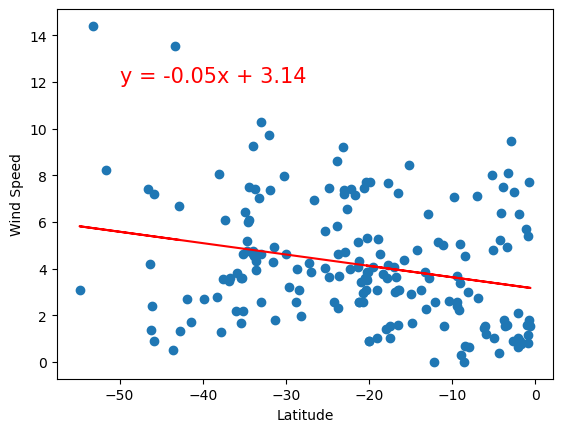

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE